- (c) Ken-ichi Fukui, 2020/01/17
- MIT License

## SOM学習によるglassデータの可視化
- 要somoclu
 - APIリファレンス: https://somoclu.readthedocs.io/en/stable/
- somocluはPython 3.7に非対応なので注意
- glass.dataを本プログラムと同じフォルダ内に配置すること

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
import somoclu

### glassデータの読み込み

In [2]:
df_glass = pd.read_csv("glass.data", header=None)
df_glass.columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

X = df_glass[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']].values
X_std = np.float32(scale(X))
y = df_glass['Type'].values

n_feature = X.shape[1]
n_class = max(df_glass['Type'].values)

### SOM学習

In [3]:
som = somoclu.Somoclu(n_rows=10, n_columns=15, initialization="pca",  gridtype='rectangular')
som.train(data=X_std, epochs=200)

### U-matrix表示

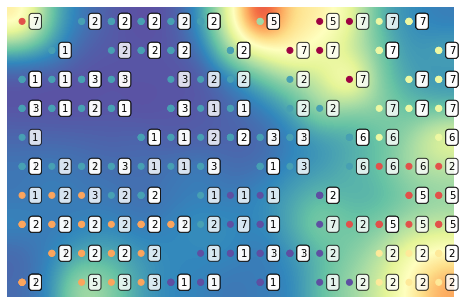

In [4]:
# 別途，参照ベクトルを入力としてK-meansクラスタリングを実行
som.cluster()
# U-matrix表示の描画
som.view_umatrix(labels=y, bestmatches=True)
plt.show()

### 参照ベクトルの各特徴量の分布


RI


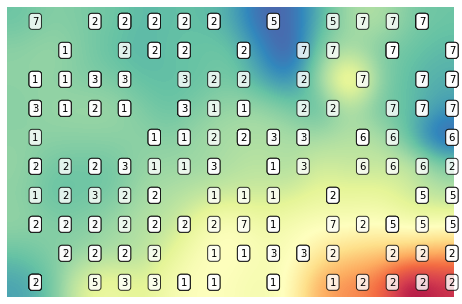

Na


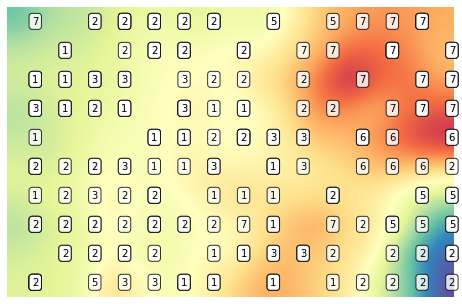

Mg


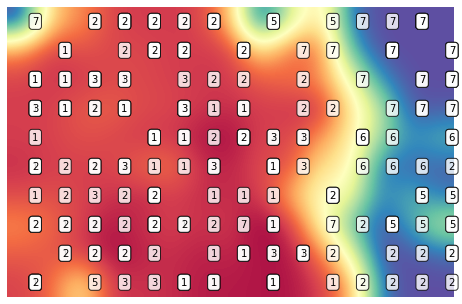

Al


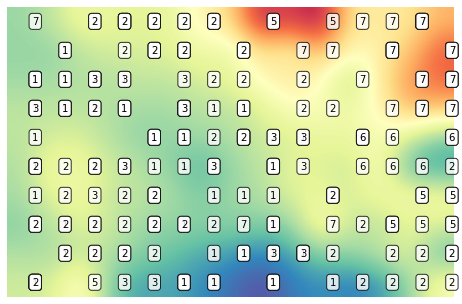

Si


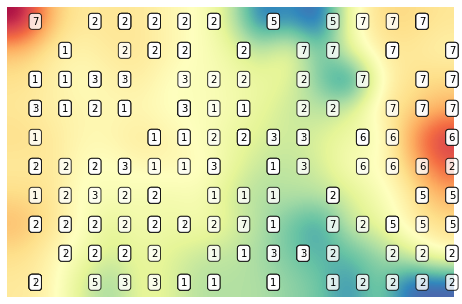

K


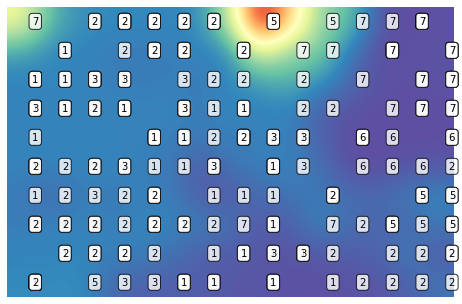

Ca


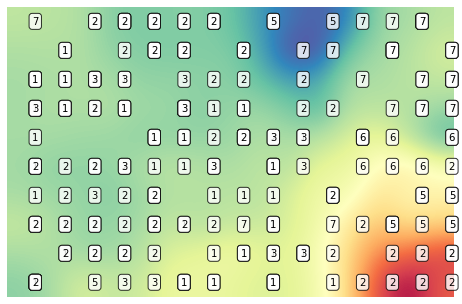

Ba


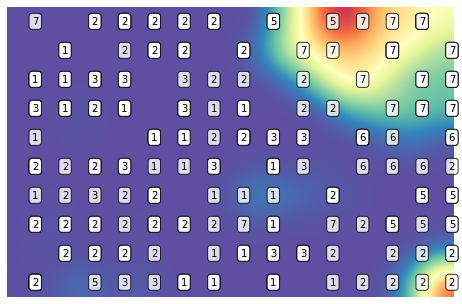

Fe


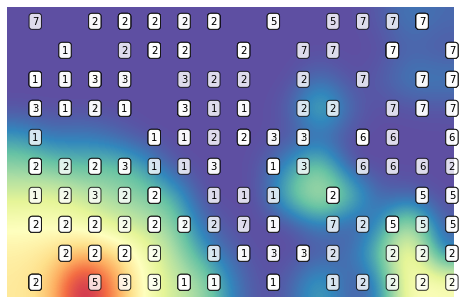

In [5]:
for i in range(n_feature):
    print(df_glass.columns[i+1])
    som.view_component_planes(dimensions=[i], labels=y)
    
plt.show()